In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import numpy as np
import os
os.getcwd() 

'TCHEM_INSTALL_PATH/example/runs/T-CSTR/CH4_PT_Quinceno2006'

In [2]:
data = np.genfromtxt("CSTRSolutionODE.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)

In [3]:
def makefigure3(x, y1, y2, y3, info, figure_name='TempDensVelPFR' ):
    
    label1 = info['label1']['label']
    label2 = info['label2']['label']
    label3 = info['label3']['label']
    
    ylabel1 = label1 + info['label1']['units']
    ylabel2 = info['label2']['units']
    
    fig = plt.figure()
    host = AA.Axes(fig, [0.1, 0.1, 0.8, 0.8]) 
    fig.add_axes(host)

    par1 = host.twinx()

    host.set_xlabel("Time [s]")
    host.set_ylabel(ylabel1)
    par1.set_ylabel(ylabel2)

    p1 = host.plot(x, y1,'r-', label=label1)
    p2 = par1.plot(x, y2,'b-', label=label2)
    p3 = par1.plot(x, y3,'g-', label=label3)

    loc_x = info['loc_x']
    loc_y = info['loc_y']
    
    par1.set_xlim(info['xlim'])

    # added these three lines
    lns = p1+p2+p3
    labs = [l.get_label() for l in lns]
    host.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),frameon=False)

    inset = AA.Axes(fig, [info['inset_x1'], info['inset_y1'], info['inset_x2'], info['inset_y2']]) 
    fig.add_axes(inset)
    inset.plot(x, y1,'r.-')
    inset.set_yticks([])
    par2 = inset.twinx()
    par2.set_yticks([])
    par2.plot(x, y2,'b.-')
    par2.plot(x, y3,'g.-')

    inset.set_xlim(info['xlim2'])
    
    mark_inset(host, inset, loc1=2, loc2=4, fc="none", ec="0.75")
        
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    
    plt.savefig(figure_name,bbox_inches='tight')
    return 

In [4]:
def makePlotV2(x, y1, y2, y3, info, fig_name):
    loc_x = info['loc_x']
    loc_y = info['loc_y']
    
    ys1 = info['label1']['scale']
    ys2 = info['label2']['scale']
    ys3 = info['label3']['scale']
    
    if ys1== 1:
        label1 = info['label1']['label']
    else:    
        label1 = info['label1']['label'] + ' x'+str(ys1)
        
    if ys2== 1:
        label2 = info['label2']['label']
    else:    
        label2 = info['label2']['label'] + ' x'+str(ys2)
        
    if ys3== 1: 
        label3 = info['label3']['label']
    else:     
        label3 = info['label3']['label'] + ' x'+str(ys3)
    
    fig, ax = plt.subplots(figsize=[5,4])
    p1 = ax.plot(x, y1/ys1,'r-',label = label1)
    p2 = ax.plot(x, y2/ys2,'g-',label = label2)
    p3 = ax.plot(x, y3/ys3,'b-',label = label3)
    plt.xlabel(info['xlabel'])
    plt.ylabel(info['ylabel'])
    
    plt.xlim(info['xlim'])
    plt.ylim(info['ylim'])
    
    
#     axins = zoomed_inset_axes(ax, info['zoom_scale'], loc =1) # zoom = 2
    if info['add_zoom'] == True:
        axins = ax.inset_axes(info['loc_zoom'])
#     axins = ax.inset_axes(ax, 1,1 , loc=2,bbox_to_anchor=(0.2, 0.55),bbox_transform=ax.figure.transFigure)
        axins.plot(x,y1/ys1,'r.-')
        axins.plot(x,y2/ys2,'g.-')
        axins.plot(x,y3/ys3,'b.-')
    
    # sub region of the original image
        x1, x2, y1s, y2s = info['zoom']
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1s, y2s)
        axins.set_yticks([])
        axins.set_xticks([])
    # added these three lines
        lns = p1+p2+p3
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),frameon=False)
    
    
#     axins.xticks(visible=False)
#     axins.yticks(visible=False)
    
    # draw a bbox of the region of the inset axes in the parent axes and
    # connecting lines between the bbox and the inset axes area
        mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.75")
    else:
        lns = p1+p2+p3
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),frameon=False)
    plt.draw()
    plt.savefig(fig_name,bbox_inches='tight')
    
    return



In [5]:
print(Header)

['iter', 't', 'dt', 'Density[kg/m3]', 'Pressure[Pascal]', 'Temperature[K]', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO', 'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN', 'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO', 'CH3CHO', '_PT_', 'O_PT', 'H2O_PT', 'CO2_PT', 'CO_PT', 'OH_PT', 'H_PT', 'CH3_PT', 'CH2_PT', 'CH_PT', 'C_PT']


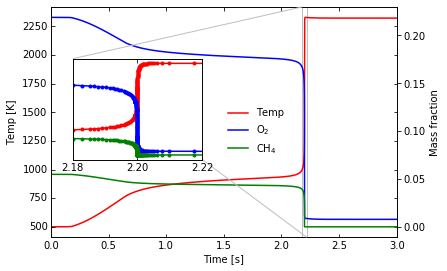

In [11]:
info={}
info['label1'] = {'label':'Temp','units':' [K]'}
info['label2'] = {'label':'$\mathrm{O}_2$','units':'Mass fraction'}
info['label3'] = {'label':'$\mathrm{CH}_4$','units':'Mass fraction'}
info['loc_x'] = 0.7
info['loc_y'] = 0.6
info['xlim'] = [0.,3]
info['xlim2'] = [2.18,2.22]
info['inset_x1'] = 0.15
info['inset_y1'] = 0.37
info['inset_x2'] = 0.3
info['inset_y2'] = 0.35
x  = solTchem[:,Header.index('t')]
y1 = solTchem[:,Header.index('Temperature[K]')]
y2 = solTchem[:,Header.index('O2')]
y3 = solTchem[:,Header.index('CH4')]
makefigure3(x, y1, y2, y3, info, figure_name='TempCH4O2.pdf')

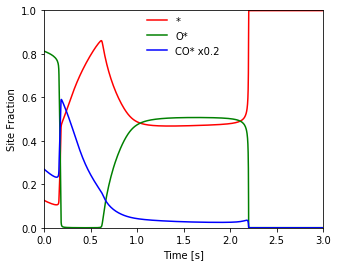

In [7]:
info={}
info['xlabel'] = 'Time [s]'
info['ylabel'] = 'Site Fraction'
info['zoom'] = [0.55, 0.8, 0.0, 0.012]
info['loc_x'] = 0.5
info['loc_y'] = 0.75
info['zoom_scale'] = 3
info['xlim'] = [0.,3]
info['ylim'] = [0.,1]
info['loc_zoom'] = [0.5, 0.1, 0.47, 0.6]
info['label1'] = {'label':'*','scale':1}
info['label2'] = {'label':'O*','scale':1}
info['label3'] = {'label':'CO*','scale':2e-1}
info['add_zoom']=False
y1 = solTchem[:,Header.index('_PT_')]
y2 = solTchem[:,Header.index('O_PT')]
y3 = solTchem[:,Header.index('CO_PT')]

makePlotV2(x, y1, y2, y3, info, 'surface.pdf')